<a href="https://colab.research.google.com/github/oushnik23/Titanic-Data/blob/main/Titanic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Directory

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
t_train=pd.read_csv("train.csv")
t_test=pd.read_csv("test.csv")

In [4]:
t_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
t_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
t_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
t_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
t_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Searching for Mising value

In [8]:
t_train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

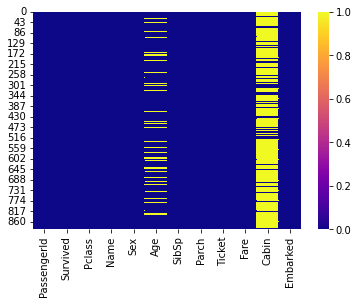

In [9]:
sns.heatmap(t_train.isnull(),cmap='plasma')

**filling the missing value**

In [10]:
t_train['Age']=t_train['Age'].fillna(t_train.Age.mean())
t_train['Embarked']=t_train['Embarked'].fillna('S')
t_train['Cabin']=t_train['Cabin'].fillna(t_train.Cabin.mode()[1])

In [31]:
t_train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

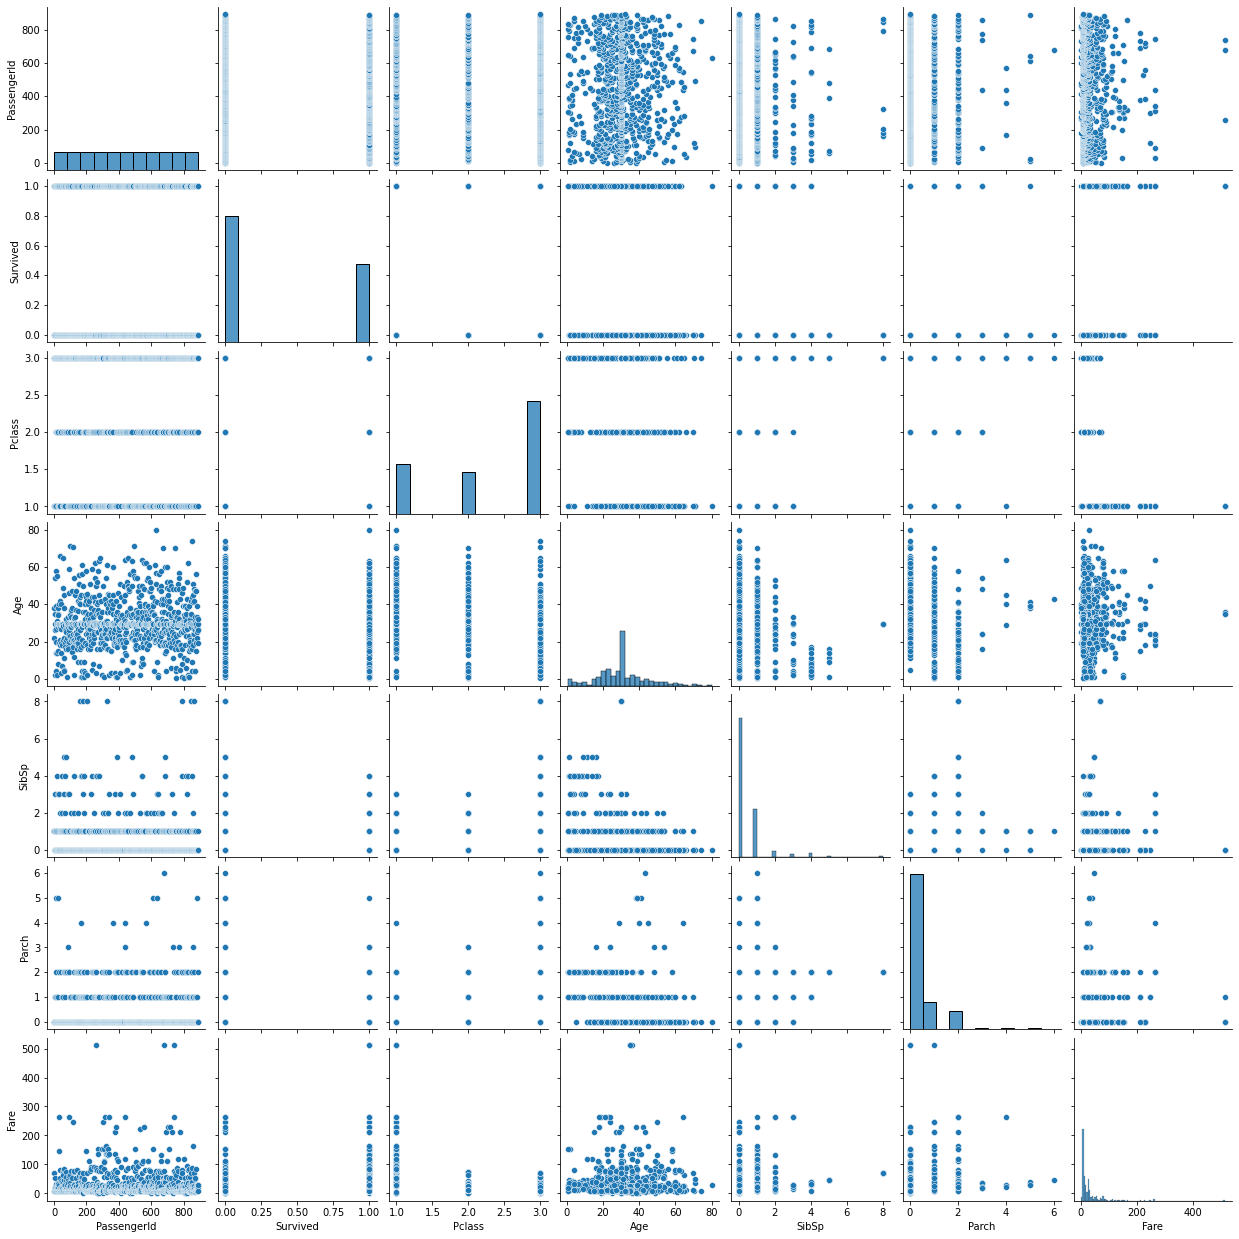

In [19]:
sns.pairplot(t_train)

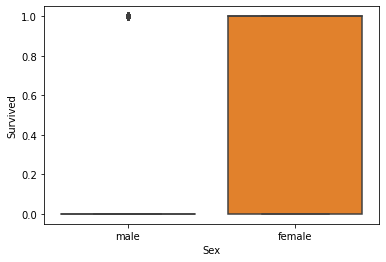

In [23]:
sns.boxplot(data=t_train,x='Sex',y='Survived')

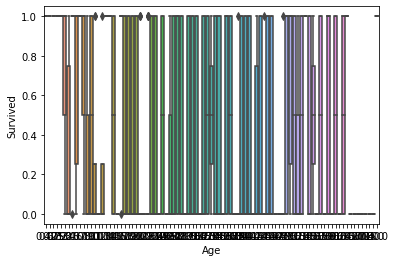

In [24]:
sns.boxplot(data=t_train,x='Age',y='Survived')

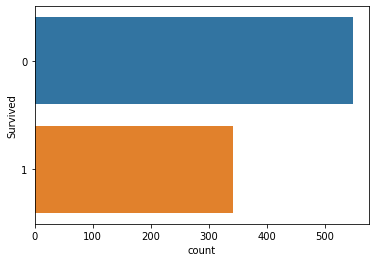

In [25]:
sns.countplot(data=t_train,y='Survived')

Dividing the dataset into dependent and independent features

In [11]:
x=t_train.drop(['Survived','Cabin','Name','Ticket'],axis=1)
y=t_train[['Survived']]

One Hot Encoding

In [12]:
x=pd.get_dummies(x)

In [13]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.000000,1,0,7.2500,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,3,26.000000,0,0,7.9250,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,1,0,0,0,1
4,5,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,0,1,0,0,1
887,888,1,19.000000,0,0,30.0000,1,0,0,0,1
888,889,3,29.699118,1,2,23.4500,1,0,0,0,1
889,890,1,26.000000,0,0,30.0000,0,1,1,0,0


In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2)

**Creating Logistic regression model**

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr_model=LogisticRegression()
lr_model.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_pred=lr_model.predict(x)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.77      0.69      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



In [26]:
t_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
t_test=t_test.drop(['Cabin','Name','Ticket'],axis=1)

**Searching for mising value in Test data**

In [28]:
t_test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [29]:
t_test['Age']=t_test['Age'].fillna(t_test.Age.mean())
t_test['Fare']=t_test['Fare'].fillna(t_test.Fare.mean())

In [30]:
t_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [32]:
test_data=pd.get_dummies(t_test)

In [33]:
test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.50000,0,0,7.8292,0,1,0,1,0
1,893,3,47.00000,1,0,7.0000,1,0,0,0,1
2,894,2,62.00000,0,0,9.6875,0,1,0,1,0
3,895,3,27.00000,0,0,8.6625,0,1,0,0,1
4,896,3,22.00000,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0,1,0,0,1
414,1306,1,39.00000,0,0,108.9000,1,0,1,0,0
415,1307,3,38.50000,0,0,7.2500,0,1,0,0,1
416,1308,3,30.27259,0,0,8.0500,0,1,0,0,1


In [35]:
prediction=lr_model.predict(test_data)

In [36]:
output = pd.DataFrame({'PassengerId': t_test.PassengerId, 'Survived': prediction})

In [37]:
output.to_csv('my_submission.csv', index=False)